In [1]:
import pandas as pd

In [2]:
cities = pd.read_csv('State_Population_Data.csv')
cities

,Geographic Area,Latitude,Longitude,2021 Population Estimate (as of July 1)
0,Aguilar town,37.40,-104.66,452
1,Akron town,40.16,-103.22,"1,770"
2,Alamosa city,37.47,-105.88,"9,814"
3,Alma town,39.29,-106.07,298
4,Antonito town,37.08,-106.01,647
...,...,...,...,...
264,Winter Park town,39.88,-105.78,"1,031"
265,Woodland Park city,39.00,-105.06,"7,983"
266,Wray city,40.08,-102.23,"2,308"
267,Yampa town,40.15,-106.91,407


In [3]:
# renaming a column so it's shorter (important for future referencing)
cities.rename(columns = {'2021 Population Estimate (as of July 1)' : 'Population'}, inplace = True)

In [4]:
cities

,Geographic Area,Latitude,Longitude,Population
0,Aguilar town,37.40,-104.66,452
1,Akron town,40.16,-103.22,"1,770"
2,Alamosa city,37.47,-105.88,"9,814"
3,Alma town,39.29,-106.07,298
4,Antonito town,37.08,-106.01,647
...,...,...,...,...
264,Winter Park town,39.88,-105.78,"1,031"
265,Woodland Park city,39.00,-105.06,"7,983"
266,Wray city,40.08,-102.23,"2,308"
267,Yampa town,40.15,-106.91,407


In [5]:
cities.columns

Index(['Geographic Area', 'Latitude', 'Longitude', 'Population'], dtype='object')

Assign `Latitude`, `Longitude`, and `Population` to different variables

In [6]:
latitude = cities['Latitude']

In [7]:
longitude = cities['Longitude']

In [8]:
population = cities['Population']

In [9]:
# get rid of all commas for equations later
cities.replace(',','', regex=True, inplace=True)

In [10]:
cities.head()

,Geographic Area,Latitude,Longitude,Population
0,Aguilar town,37.40,-104.66,452
1,Akron town,40.16,-103.22,1770
2,Alamosa city,37.47,-105.88,9814
3,Alma town,39.29,-106.07,298
4,Antonito town,37.08,-106.01,647


In [11]:
# setting cities['Population'] to be a float because we'll need it later for running equations
cities['Population'] = cities['Population'].astype('float')

In [12]:
population = cities['Population'].astype('float')

In [13]:
cities.head()

,Geographic Area,Latitude,Longitude,Population
0,Aguilar town,37.40,-104.66,452.0
1,Akron town,40.16,-103.22,1770.0
2,Alamosa city,37.47,-105.88,9814.0
3,Alma town,39.29,-106.07,298.0
4,Antonito town,37.08,-106.01,647.0


In [14]:
# need to download geopandas because it is not pre-installed with Anaconda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [15]:
# read file similar to pd.read_csv
county_borders = gpd.read_file('Colorado_County_Boundaries.geojson')

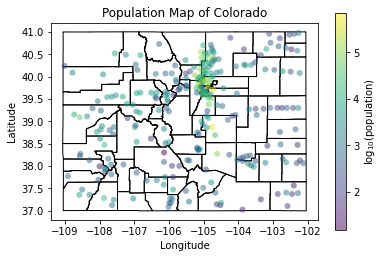

In [16]:
# show county borders in black
county_borders.plot(edgecolor='black', facecolor='none')

# create a scatterplot for the cities Colorado
plt.scatter(longitude, latitude, label = None, # call in our variables from before, no labels
            # linewidth thin, alpha is opaqueness, c is a log for the population (makes it easier to have a scale)
            linewidth = 0, alpha = 0.5, c = np.log10(population))

# use this to remove gridlines
plt.grid(False)

# use this to create a colorbar legend for population
plt.colorbar(label='log$_{10}$(population)')

# labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population Map of Colorado')
plt.show()